# Tutorial: Hello Bash and Python

In this tutorial we will familiarise ourselves with bash and python, and Notebooks (inadvertantly). Please load this notebook in `colab.research.google.com` if you do not have a local instance of JupyterHub/JupyterLab running.


Submission:

The submission for this tutorial requires a submission on Git, as well as one on SUNLearn.




In [2]:
import pandas as pd

## Question 1: Bash

Retrieve data and interogate it with bash before using python tooling. This is useful as you may struggle with type or malformed files and a quick interogation may reveal those issues.


### Question 1.1

Run the bash command `wget` to retrieve a file located at `https://storage.googleapis.com/bdt-beam/users_v.csv` [1]

In [1]:
! wget https://storage.googleapis.com/bdt-beam/users_v.csv

--2024-09-11 15:44:47--  https://storage.googleapis.com/bdt-beam/users_v.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.27, 172.217.0.91, 172.217.12.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 143675 (140K) [text/csv]
Saving to: ‘users_v.csv’

users_v.csv         100%[===================>] 140.31K   416KB/s    in 0.3s    

2024-09-11 15:44:48 (416 KB/s) - ‘users_v.csv’ saved [143675/143675]



### Question 1.2

Use a bash command to view the top ten elements of the file (to confirm that things are as you expect) [1]

In [3]:
! head -n 10 users_v.csv

user_id,name,gender,age,address,date_joined
1,Anthony Wolf,male,73,New Rachelburgh-VA-49583,2019/03/13
2,James Armstrong,male,56,North Jillianfort-UT-86454,2020/11/06
3,Cody Shaw,male,75,North Anne-SC-53799,2004/05/29
4,Sierra Hamilton,female,76,New Angelafurt-ME-46190,2005/08/26
5,Chase Davis,male,31,South Bethmouth-WI-18562,2018/04/30
6,Sierra Andrews,female,21,Ryanville-MI-69690,2007/05/25
7,Ann Stone,female,41,Smithmouth-SD-17340,2005/01/05
8,Karen Santos,female,34,Mariaville-AK-29888,2003/12/12
9,Ronald Meyer,male,41,North Cherylhaven-NJ-04197,2015/11/14


### Question 1.3

Use a bash command to determine the number of rows in the file [1]

In [4]:
! wc -l users_v.csv

2358 users_v.csv


### Question 1.4

Suppose the file is too large for initial exploration, let's take a quick sample so that we can continue working to see what is in the data set. Loading it into Pandas at this point will mean that we are using all that memory in any case, so let's sample it before we load it.

Take a random sample of the file (limited the result to 1000 lines) and create another file called `users_sample.csv`, using only bash commands [3]

Hint: redirect a stream into a the output file.

In [5]:
! shuf -n 1000 users_v.csv > users_sample.csv

### Question 1.5

* Sort your file by ascending `user_id`s [1]
* Overwrite the current `users_sample.csv` with the ordered content [1]
* Print the last ten lines of this file [1]

In [6]:
! sort -t, -k1,1 users_sample.csv -o users_sample.csv | tail -n 10 users_sample.csv

1137,Theresa Brown,female,45,West Kimberly-CT-26809,2010/11/29
1540,Alexander Cooper,male,42,Bennettport-MN-38411,2002/06/20
2261,Michael Phillips,male,59,Matthewmouth-NM-85760,2013/04/23
1934,Brian Christensen,male,60,Port Melissatown-NY-11632,2021/03/19
2204,Amy Herring,female,79,North Cynthiaborough-WV-41871,2012/10/16
1738,Michelle Rich,female,70,New Lisafurt-SD-85899,2008/09/05
370,Yolanda Coleman,female,35,Port Chelseaton-TN-95413,2020/02/28
994,Kristi Perry,female,64,Elizabethmouth-NV-66181,2021/03/18
1845,Stephanie Woodward DVM,female,34,East James-NJ-87013,2015/02/05
1312,Jo Mccoy,female,21,Mcdowellfort-AR-79609,2003/06/06


## Question 2: Python

Perform analysis with Python

### Question 2.1

Load the original `users_v.csv` into a Pandas dataframe [1]

In [7]:
df = pd.read_csv("users_v.csv")

### Question 2.2

Display/print the top ten lines of the dataframe [1]



In [8]:
print(df.head(10))

   user_id             name  gender  age                     address  \
0        1     Anthony Wolf    male   73    New Rachelburgh-VA-49583   
1        2  James Armstrong    male   56  North Jillianfort-UT-86454   
2        3        Cody Shaw    male   75         North Anne-SC-53799   
3        4  Sierra Hamilton  female   76     New Angelafurt-ME-46190   
4        5      Chase Davis    male   31    South Bethmouth-WI-18562   
5        6   Sierra Andrews  female   21          Ryanville-MI-69690   
6        7        Ann Stone  female   41         Smithmouth-SD-17340   
7        8     Karen Santos  female   34         Mariaville-AK-29888   
8        9     Ronald Meyer    male   41  North Cherylhaven-NJ-04197   
9       10    Steven Rivera    male   43          Wayneside-VT-29040   

  date_joined  
0  2019/03/13  
1  2020/11/06  
2  2004/05/29  
3  2005/08/26  
4  2018/04/30  
5  2007/05/25  
6  2005/01/05  
7  2003/12/12  
8  2015/11/14  
9  2003/05/15  


### Question 2.3

Find the age of the oldest and youngest person in the dataset [1]

Hint: you can use the `print(..., ...)` function to display the two values if you construct it as two arguments

In [9]:
print(df.age.max(), df.age.min())

80 18


### Question 2.4

Draw descriptive statistics (one-liner) for the `age` column - these statistics should include `count`, `mean`, and `std` [1]

Hint: this command has a parallel in R

In [10]:
print(df.age.describe())

count    2357.000000
mean       49.054731
std        18.206348
min        18.000000
25%        33.000000
50%        49.000000
75%        65.000000
max        80.000000
Name: age, dtype: float64


### Question 2.5

* Using anonymous functions (`lambda`), create a `surname` column from the name column (you may assume that the last word without a space is the surname) [2]
* Display the last 10 lines of your dataframe [1]


In [11]:
df['surname'] = df.name.apply(lambda x: x.split()[-1])
print(df.tail(10))

      user_id                 name  gender  age                    address  \
2347     2348     Victoria Edwards  female   68    Lake Jamesberg-NY-88824   
2348     2349          Chris Ellis    male   46  Port Richardside-NY-77994   
2349     2350       Kimberly Smith  female   19      East Anthony-GA-00646   
2350     2351       William Nelson    male   67   Lake Parkerside-MN-06905   
2351     2352          Nancy Clark  female   80        Jamesshire-AK-88437   
2352     2353      Brittney Graham  female   40         Brownland-CO-71229   
2353     2354      Allison Schmidt  female   43        Port Logan-MD-38588   
2354     2355  Christopher Johnson    male   68   North Justinton-VA-32798   
2355     2356           Mark Brown    male   67    New Kayleefurt-MA-82581   
2356     2357      Steven Robinson    male   45         Mistytown-HI-31737   

     date_joined   surname  
2347  2001/09/03   Edwards  
2348  2011/03/18     Ellis  
2349  2021/06/20     Smith  
2350  2005/12/21    Nelso

### Question 2.6

* Convert `date_joined` to a pandas series of type `datetime`  [1]
* Overwrite the original `date_joined` column with the result [1]

In [12]:
pd.to_datetime(df['date_joined'])

,date_joined
0,2019-03-13
1,2020-11-06
2,2004-05-29
3,2005-08-26
4,2018-04-30
...,...
2352,2005-07-10
2353,2008-11-30
2354,2006-08-01
2355,2013-11-16


In [13]:
df['date_joined'] = pd.to_datetime(df['date_joined'])

## Question 3: Git

Push your notebook to Git. If you don't have any Git tooling installed on your machines, download a preferred tool.

 * Create a repository (named `day1-tutorial`) on Gitlab (check your student email for sign-up/membership request to Gitlab) [1]
 * Push this notebook to that repository [1]

In [14]:
!git config --global user.email "24140368@sun.ac.za"
!git config --global user.name "Vuyogift"
!git add hello-python-git-assessment.ipynb


fatal: pathspec 'hello-python-git-assessment.ipynb' did not match any files


## The End

Now that it is a datetime, we can how many users signed up/registered.

<Axes: xlabel='date_joined'>

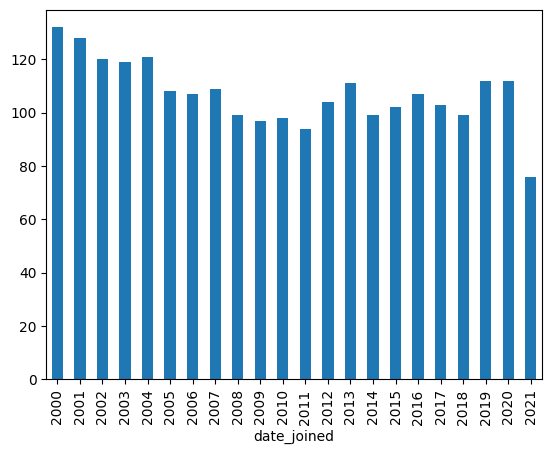

In [14]:
import matplotlib

%matplotlib inline

df.user_id.groupby([df.date_joined.dt.year]).count().plot(kind="bar")